In [1]:
import numpy as np
import pandas as pd
from scipy.sparse import hstack, vstack, csr_matrix
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, cross_validate, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from typing import Union, List

%load_ext autoreload 
%autoreload 2

In [3]:
from tools import write_to_submission_file, get_auc_scores, AliceKaggle

In [17]:
%%time
alice = AliceKaggle()

In [46]:
%%time
logit = LogisticRegression(random_state=17, solver='liblinear')
get_auc_scores(alice.X_train, alice.y_train, logit)['test_score'].mean()

Wall time: 9.87 s


0.8692386533117059

In [13]:
%%time
rf = RandomForestClassifier(max_depth=5, n_estimators=30, random_state=17)
get_auc_scores(alice.X_train, alice.y_train, rf)['test_score'].mean()

Wall time: 12.3 s


0.7047474727865729

In [25]:
%%time
X_train_new, X_test_new = alice.add_multi_feature(alice.feat_df.columns, alice.X_full)

Wall time: 23 s


In [26]:
%%time
get_auc_scores(X_train_new, alice.y_train, rf)['test_score'].mean()

Wall time: 58.6 s


0.8972529025509168

In [47]:
%%time
get_auc_scores(X_train_new, alice.y_train, logit)['test_score'].mean()

Wall time: 54.3 s


0.8940464471165808

1 / 15
2 / 15
3 / 15
4 / 15
5 / 15
6 / 15
7 / 15
8 / 15
9 / 15
10 / 15
11 / 15
12 / 15
13 / 15
14 / 15
15 / 15
Best results:
max_depth: 24
0.7826


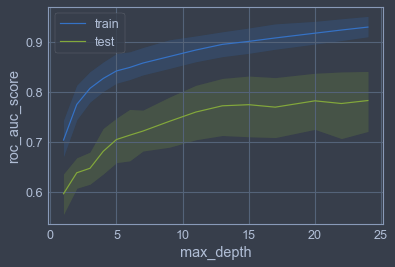

In [23]:
param_grid = [1, 2, 3, 4, 5, 6, 7, 9, 11, 13, 15, 17, 20, 22, 24]
param_name = 'max_depth'
scores = alice.param_search(alice.X_train, param_grid, param_name, rf)

1 / 15
2 / 15
3 / 15
4 / 15
5 / 15
6 / 15
7 / 15
8 / 15
9 / 15
10 / 15
11 / 15
12 / 15
13 / 15
14 / 15
15 / 15
Best results:
max_depth: 20
0.9005


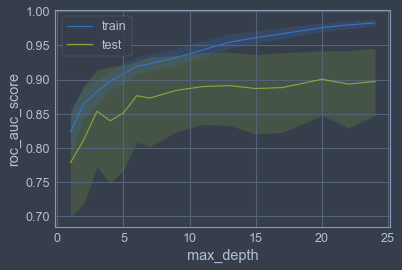

In [28]:
param_grid = [1, 2, 3, 4, 5, 6, 7, 9, 11, 13, 15, 17, 20, 22, 24]
param_name = 'max_depth'
scores = alice.param_search(X_train_new, param_grid, param_name, rf)

In [32]:
np.logspace(1.3, 2, 15).astype(int)

array([ 19,  22,  25,  28,  31,  35,  39,  44,  50,  56,  63,  70,  79,
        89, 100])

1 / 15
2 / 15
3 / 15
4 / 15
5 / 15
6 / 15
7 / 15
8 / 15
9 / 15
10 / 15
11 / 15
12 / 15
13 / 15
14 / 15
15 / 15
Best results:
max_depth: 63
0.9155


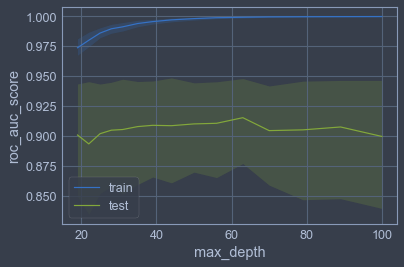

Wall time: 24min 13s


In [33]:
%%time
param_grid = np.logspace(1.3, 2, 15).astype(int)
param_name = 'max_depth'
scores = alice.param_search(X_train_new, param_grid, param_name, rf)

In [42]:
rf.set_params(**{'max_depth': 63, 'n_estimators': 100})

RandomForestClassifier(max_depth=63, random_state=17)

In [55]:
get_auc_scores(X_train_new, alice.y_train, rf)['test_score'].mean()

0.9132288647875905

In [88]:
%%time
rf.fit(X_train_new, alice.y_train)
probs_rf = alice.predict_probs(X_test_new, rf)
write_to_submission_file(probs_rf, out_file='logit_subm23.csv.zip')

Wall time: 1min 21s


In [58]:
X_train_log, X_test_log = alice.add_multi_feature(['morning', 'noon', 'evening', 
                                                   'duration', 'delta_avg', 'weekday'], alice.X_full)

In [70]:
logit.fit(X_train_log, alice.y_train)
probs_log = alice.predict_probs(X_test_log, logit)
get_auc_scores(X_train_log, alice.y_train, logit)['test_score'].mean()

0.9234871654513871

In [62]:
probs_ensemble = (probs_log + probs_rf)/2
probs_ensemble

array([0.00050829, 0.0003455 , 0.00178806, ..., 0.00073056, 0.00042929,
       0.00038978])

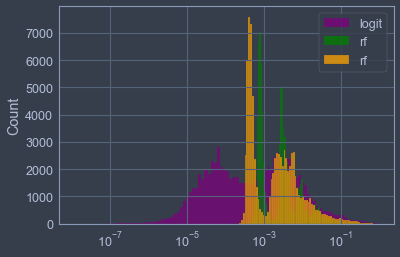

In [86]:
import seaborn as sns
sns.histplot(probs_log, label='logit', log_scale=True, color='purple')
sns.histplot(probs_rf, label='rf', log_scale=True, color='green')
sns.histplot(probs_ensemble, label='rf', log_scale=True, color='orange')
plt.legend()

In [89]:
write_to_submission_file(probs_ensemble, out_file='logit_subm24.csv.zip')